# Intuit Quickbooks Upgrade

* Team-lead GitHub userid: rsm-xyz123
* Group name: Group 5
* Team member names:

    - Bansari Kathrotia
    - Brian Gao
    - Fernando Santibanez
    - Sheena Taylor

## Setup

Please complete this python notebook with your group by answering the questions in `intuit_quickbooks.pdf`. Create a Notebook with all your results and comments and push both the Notebook to GitHub when your team is done. Before the deadline, make sure to connect the GitHub repo to GradeScope. All results MUST be reproducible (i.e., the TA and I must be able to recreate your output from the Jupyter Notebook without changes or errors). This means that you should NOT use any python-packages that are not part of the RSM-MSBA docker container.

> Note: Please do not install any packages as part of your Jupyter Notebook submission

This is the first group assignment for MGTA 455 and you will be using Git and GitHub. If two people edit the same file at the same time you could get what is called a "merge conflict". This is not something serious but you should realize that Git will not decide for you who's changes to accept. The team-lead will have to determine the edits to use. To avoid merge conflicts, **always** "pull" changes to the repo before you start working on any files. Then, when you are done, save and commit your changes, and then push them to GitHub. Make "pull first" a habit!

If multiple people are going to work on the assignment at the same time I recommend you work in different notebooks. You can then `%run ...`  these "sub" notebooks from the main assignment file. You can seen an example of this in action below for the `question1.ipynb` notebook

Some group work-flow tips:

* Pull, edit, save, stage, commit, and push
* Schedule who does what and when
* Try to avoid working simultaneously on the same file
* If you are going to work simultaneously, do it in different notebooks, e.g.,
    - question1.ipynb, question2.ipynb, question3.ipynb
* Use the `%run ... ` command to bring different pieces of code together into the main jupyter notebook
* Put python functions in modules that you can import from your notebooks. See the example below for the `example` function defined in `utils/functions.py`

A graphical depiction of the group work-flow is shown below:

![](images/github-group-workflow.png)

In [97]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyrsm as rsm
from utils import functions

# increase plot resolution
mpl.rcParams["figure.dpi"] = 150

In [98]:
rsm.__version__

'0.9.14'

In [99]:
## loading the data - this dataset must NOT be changed
intuit75k = pd.read_parquet("data/intuit75k.parquet")
rsm.md("data/intuit75k_description.md")

## Intuit: Quickbooks upgrade

The purpose of this exercise is to gain experience modeling the response to an upsell campaign. The `intuit75k.parquet` file contains data on 75,000 (small) businesses that were selected randomly from the 801,821 that were sent the wave-1 mailing. The mailing contained an offer to upgrade to the latest version of the Quickbooks software.

Variable `res1` denotes which of these businesses responded to the mailing by purchasing Quickbooks version 3.0 from Intuit Direct. Note that Intuit Direct sells products directly to its customers rather than through a retailer. Use the available data to predict which businesses that did not respond to the wave-1 mailing, are most likely to respond to the wave-2 mailing. Note that variables were added, deleted, and recoded so please ignore the variable descriptions in Exhibit 3 in the case in the course reader. Instead, use the variable descriptions below:

## Variable description

* id: Small business customer ID
* zip5: 5-Digit ZIP Code (00000=unknown, 99999=international ZIPs).
* zip_bins: Zip-code bins (20 approx. equal sized bins from lowest to highest zip code number)
* sex: Gender Identity "Female", "Male", or "Unknown"
* bizflag: Business Flag.  Address contains a Business name (1 = yes, 0 = no or unknown).
* numords: Number of orders from Intuit Direct in the previous 36 months
* dollars: Total $ ordered from Intuit Direct in the previous 36 months
* last: Time (in months) since last order from Intuit Direct in previous 36 months
* sincepurch: Time (in months) since original (not upgrade) purchase of Quickbooks
* version1: Is 1 if customer's current Quickbooks is version 1, 0 if version 2
* owntaxprod: Is 1 if customer purchased tax software, 0 otherwise
* upgraded: Is 1 if customer upgraded from Quickbooks vs. 1 to vs. 2
* res1: Response to wave 1 mailing ("Yes" if responded else "No")
* training: 70/30 split, 1 for training sample, 0 for validation sample


In [100]:
intuit75k.head()

,id,zip5,zip_bins,sex,bizflag,numords,dollars,last,sincepurch,version1,owntaxprod,upgraded,res1,training,res1_yes
0,1,94553,18,Male,0,2,109.5,5,12,0,0,0,No,1,0
1,2,53190,10,Unknown,0,1,69.5,4,3,0,0,0,No,0,0
2,3,37091,8,Male,0,4,93.0,14,29,0,0,1,No,0,0
3,4,02125,1,Male,0,1,22.0,17,1,0,0,0,No,1,0
4,5,60201,11,Male,0,1,24.5,2,3,0,0,0,No,0,0


In [101]:
# change the data type of zip_bins to category
intuit75k["zip_bins"] = intuit75k["zip_bins"].astype("category")

No plot will be created for zip5 (type object)


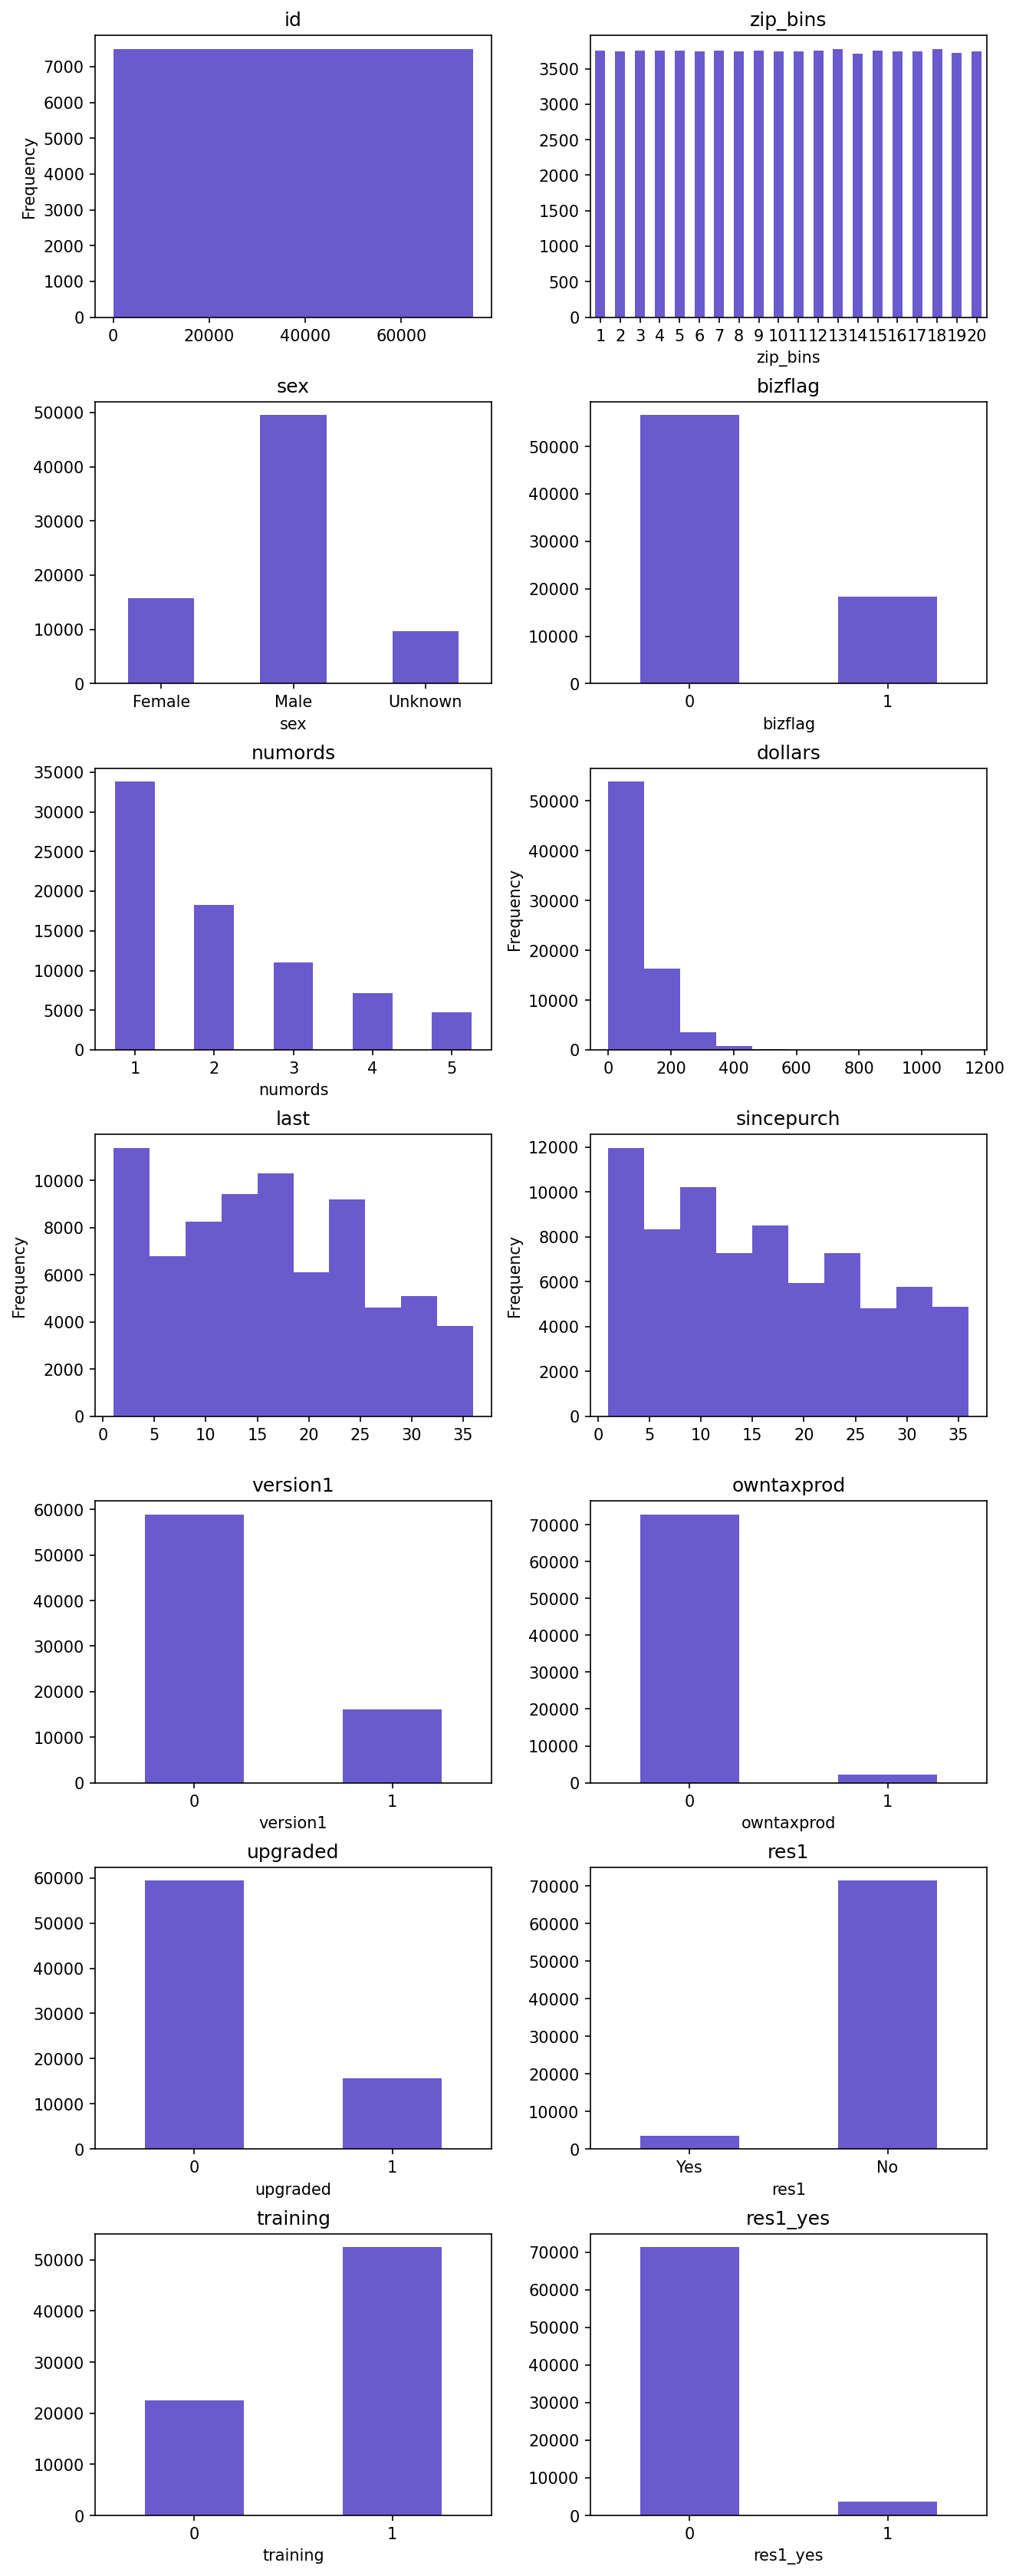

In [102]:
# create plots for all the variables in the dataset
rsm.distr_plot(intuit75k)

## Interpretation of distribution graphs:

- Sex: There are more males than females and unknown in the dataset. This could be reflecting the dataset's demographics.
- Bizflag: A small number of entries have a business flag, which indicates that most of the data pertains to non-business addresses.
- Numords: The majority of customers have only 1 or 2 orders, with very few customers having more than 3 orders.
- Dollars: Most of the dollars amounts are clustered at the lower and end of the scale, indicating that high-value orders are less common. 
- Last: There is a varied distribution of time since the last order, which might be an important feature for modeling if recent interaction with company affects the likelihood of respond.
- Sincepurch: Similar to 'last', this showsa varied distribution and could be significant predictor of response. 
- Version1: Most customers have version 2 of Quickbooks, as indicated by the low number of entries in version 1.
- Owntaxprod: Very few customers own tax products, which may be interesting variable to look at in terms of up-sellig potential. 
- Upgraded: Few customers have upgraded their quickbook version.  

In [103]:
# radiant for logistic regression model
# rsm.radiant.logistic({"intuit75k": intuit75k})

In [104]:
# radiant for neural networks model
#rsm.radiant.model.mlp({"intuit75k": intuit75k},)

In [105]:
train = intuit75k[intuit75k['training'] == 1]
test = rsm.scale_df(train, sf=1)
# intuit75k = pd.read_parquet('intuit75k.parquet')
nn1 = rsm.model.mlp(
    data={"intuit75k": test},
    rvar="res1_yes",
    evar=[
        "zip_bins",
        "bizflag",
        "numords",
        "dollars",
        "last",
        "sincepurch",
        "version1",
        "owntaxprod",
        "upgraded",
    ],
    hidden_layer_sizes=(8, 8, ),
    mod_type="classification",
)
nn1.summary()


/home/jovyan/.rsm-msba/lib/python3.11/site-packages/pyrsm/stats.py:207: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.73236084 -1.73222225 -1.73212986 ...  1.73223439  1.73228059
  1.73232679]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df.loc[:, isNum] = (dfs - means) / stds
/home/jovyan/.rsm-msba/lib/python3.11/site-packages/pyrsm/stats.py:207: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.05707945 -0.86372034 -0.86372034 ... -0.86372034 -0.86372034
 -0.86372034]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df.loc[:, isNum] = (dfs - means) / stds
/home/jovyan/.rsm-msba/lib/python3.11/site-packages/pyrsm/stats.py:207: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.13718316

Multi-layer Perceptron (NN)
Data                 : intuit75k
Response variable    : res1_yes
Level                : None
Explanatory variables: zip_bins, bizflag, numords, dollars, last, sincepurch, version1, owntaxprod, upgraded
Model type           : classification
Hidden_layer_sizes   : (8, 8)
Activation function  : tanh
Solver               : lbfgs
Alpha                : 0.0001
Batch size           : auto
Learning rate        : 0.001
Maximum itterations  : 10000
random_state         : 1234
AUC                  : 0.8

Raw data             :
zip_bins  bizflag   numords   dollars      last  sincepurch  version1  owntaxprod  upgraded
      18        0 -0.057079  0.207902 -1.137183   -0.360809         0           0         0
       1        0 -0.863720 -0.873735  0.119783   -1.458194         0           0         0
       3        0 -0.863720 -0.898458  0.119783    0.138003         0           0         1
      11        1 -0.863720 -0.842831 -1.241930    0.138003         1           0 

In [106]:
# nn.predict()

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

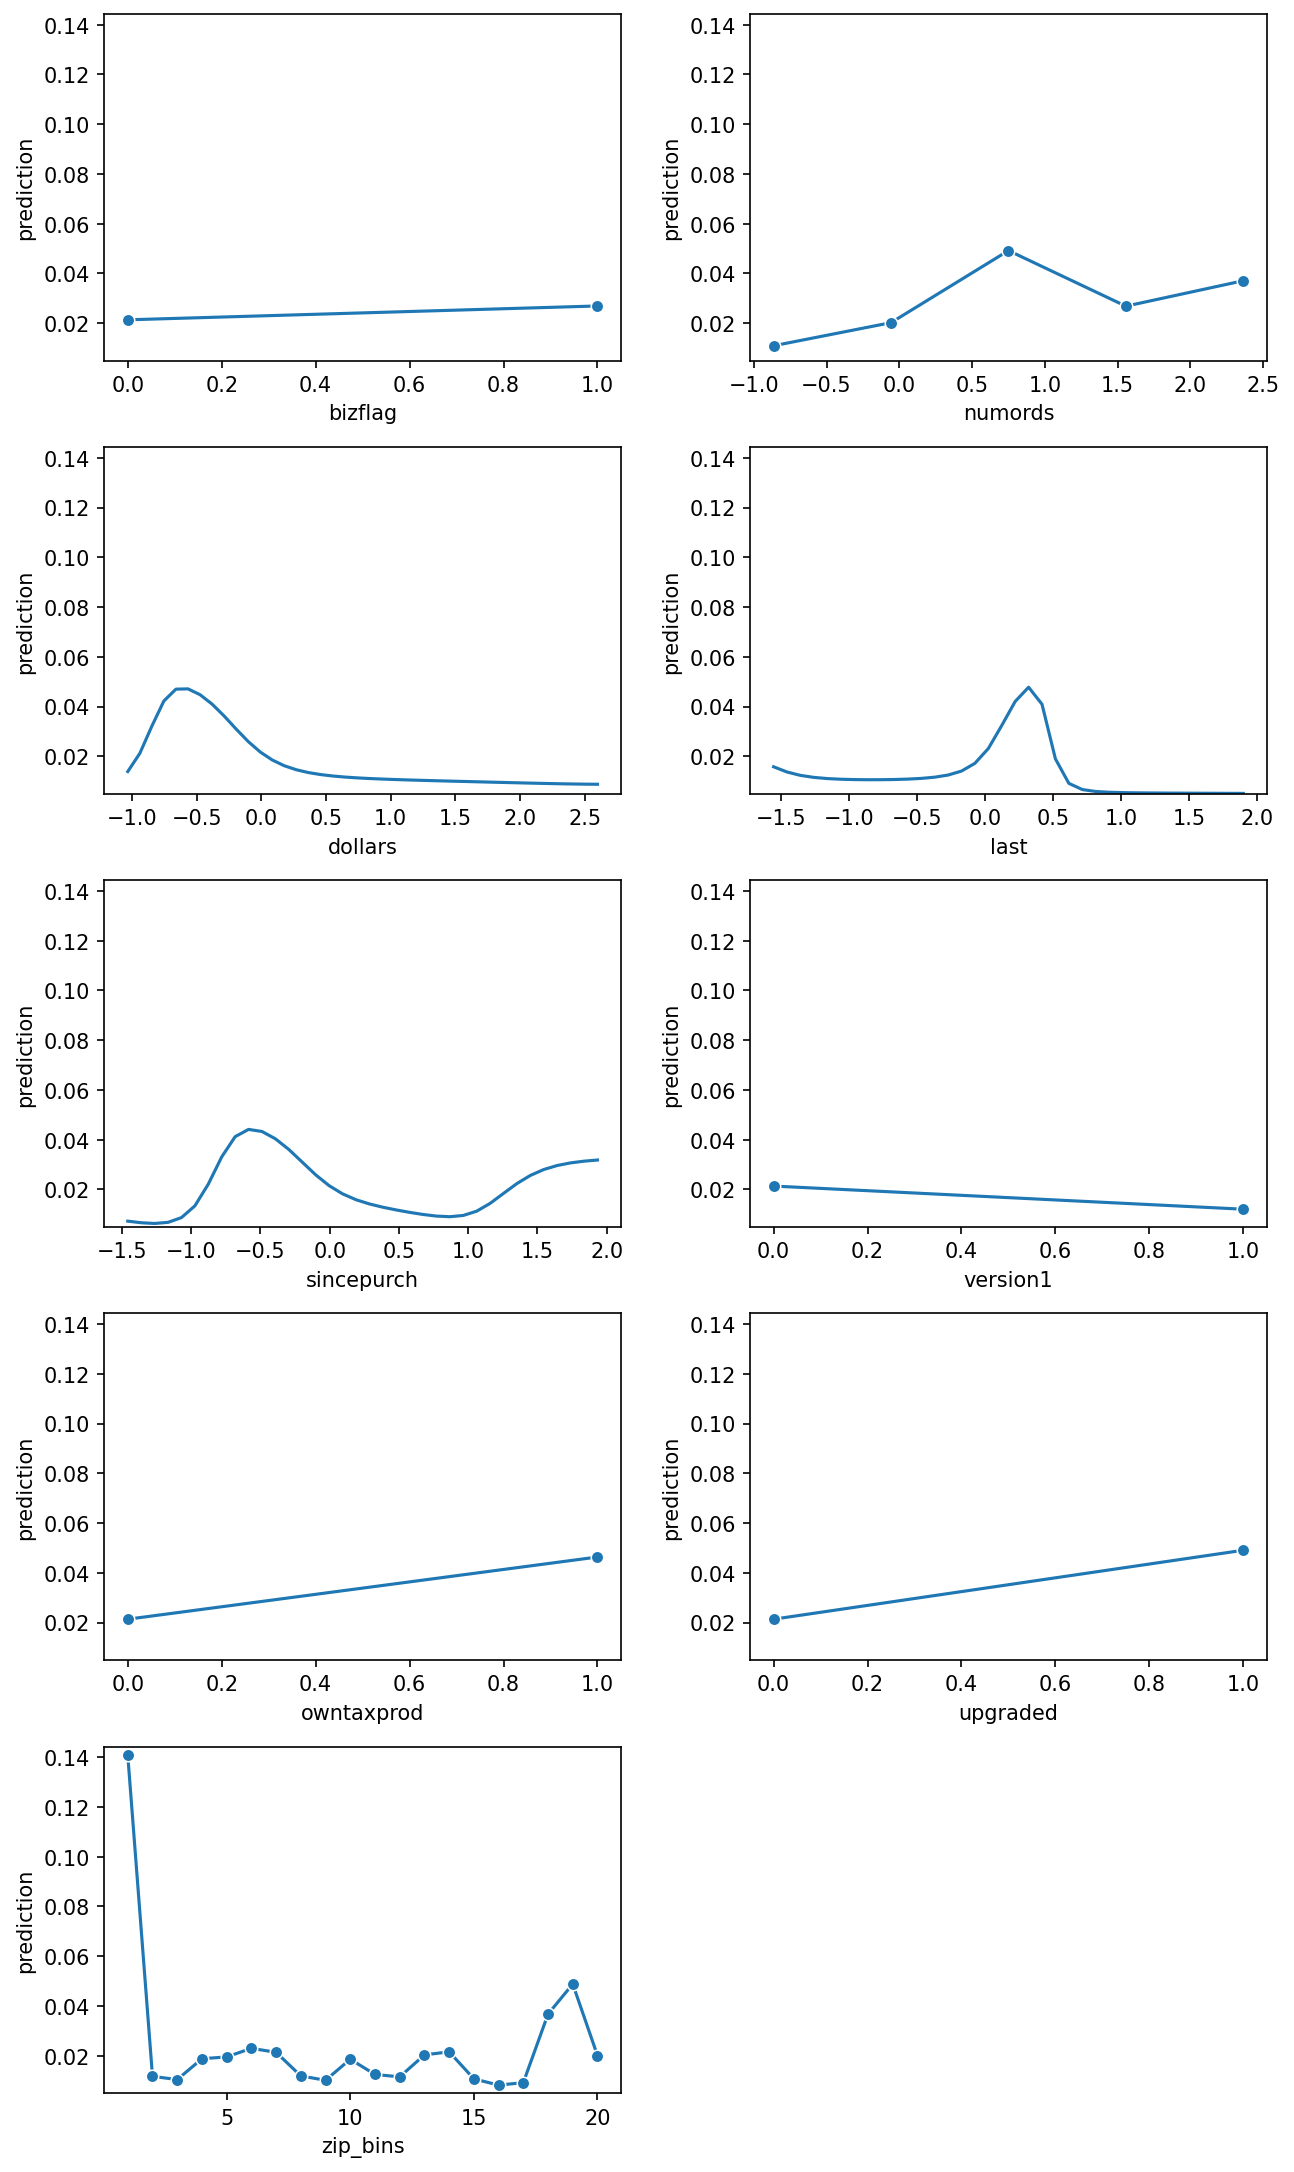

In [107]:
nn1.plot("pred")

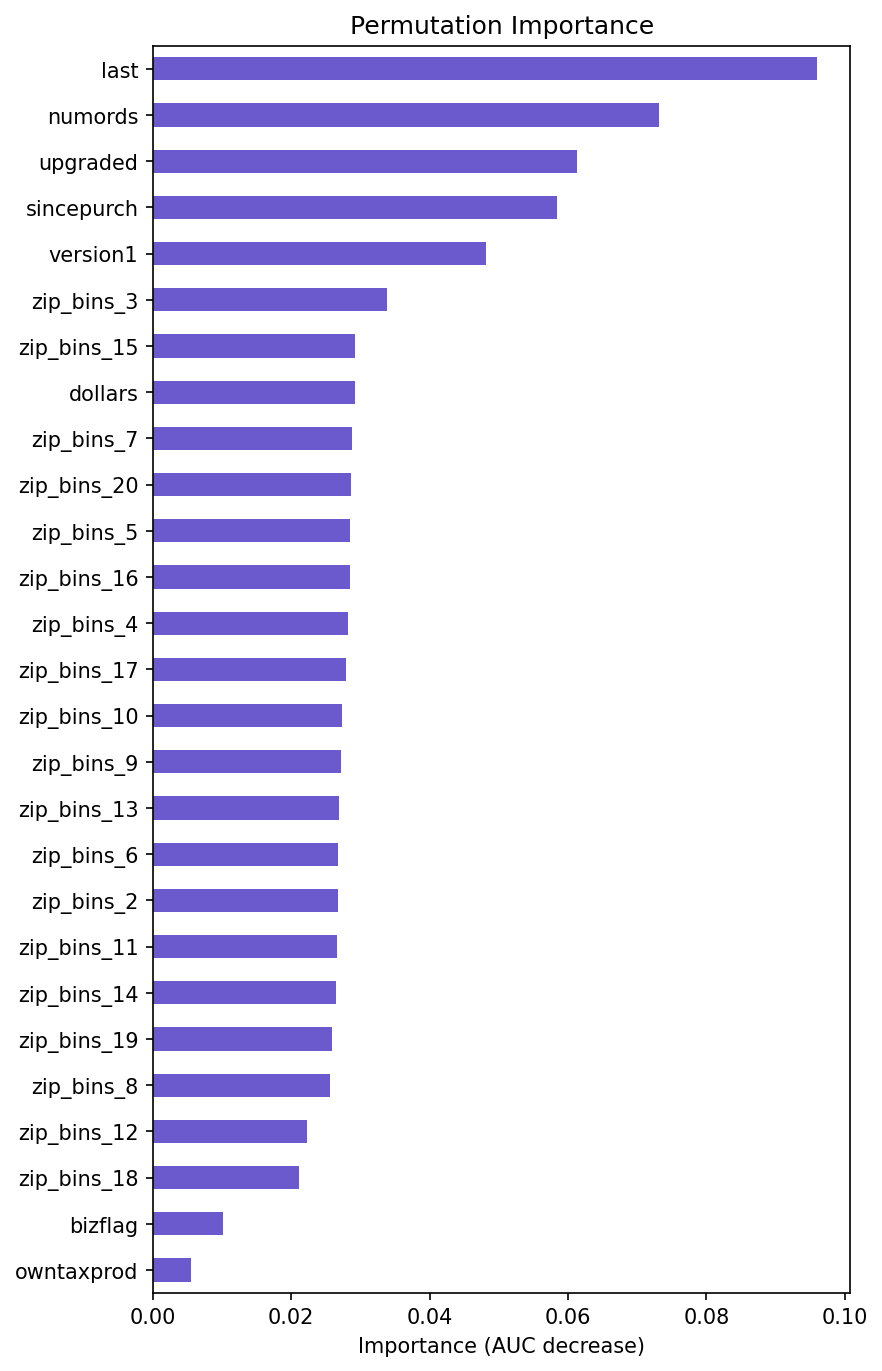

In [108]:
nn1.plot("vimp")

In [109]:
nn2 = rsm.model.mlp(
    data={"intuit75k": test},
    rvar="res1_yes",
    evar=[
        "zip_bins",
        "bizflag",
        "numords",
        "dollars",
        "last",
        "sincepurch",
        "version1",
        "owntaxprod",
        "upgraded",
    ],
    hidden_layer_sizes=(5, 5, ),
    mod_type="classification",
)
nn2.summary()

Multi-layer Perceptron (NN)
Data                 : intuit75k
Response variable    : res1_yes
Level                : None
Explanatory variables: zip_bins, bizflag, numords, dollars, last, sincepurch, version1, owntaxprod, upgraded
Model type           : classification
Hidden_layer_sizes   : (5, 5)
Activation function  : tanh
Solver               : lbfgs
Alpha                : 0.0001
Batch size           : auto
Learning rate        : 0.001
Maximum itterations  : 10000
random_state         : 1234
AUC                  : 0.78

Raw data             :
zip_bins  bizflag   numords   dollars      last  sincepurch  version1  owntaxprod  upgraded
      18        0 -0.057079  0.207902 -1.137183   -0.360809         0           0         0
       1        0 -0.863720 -0.873735  0.119783   -1.458194         0           0         0
       3        0 -0.863720 -0.898458  0.119783    0.138003         0           0         1
      11        1 -0.863720 -0.842831 -1.241930    0.138003         1           0

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

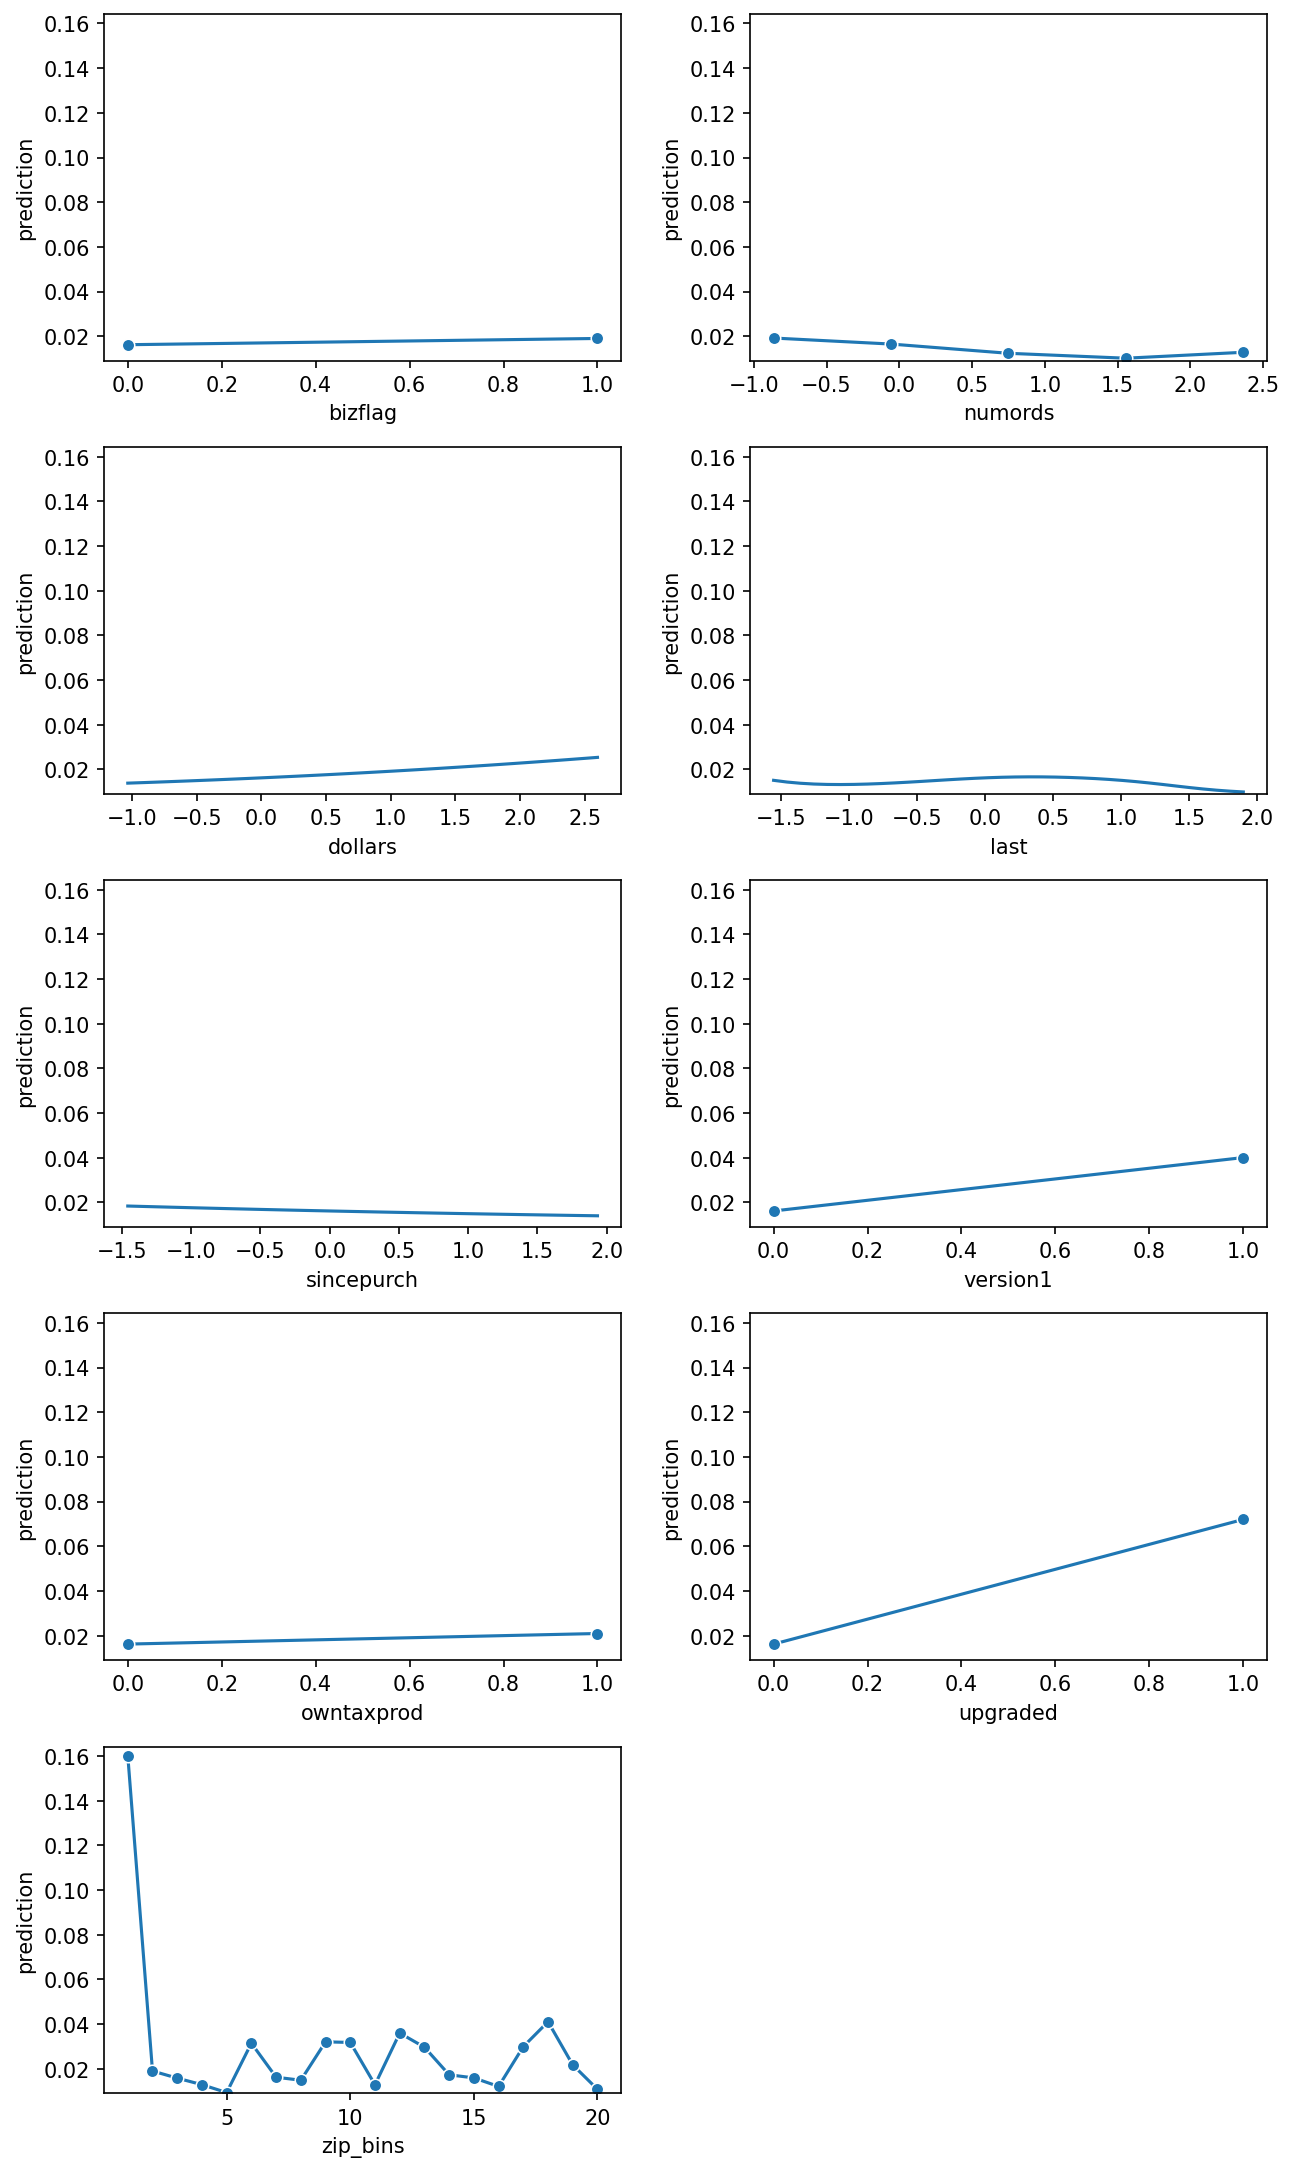

In [110]:
nn2.plot('pred')

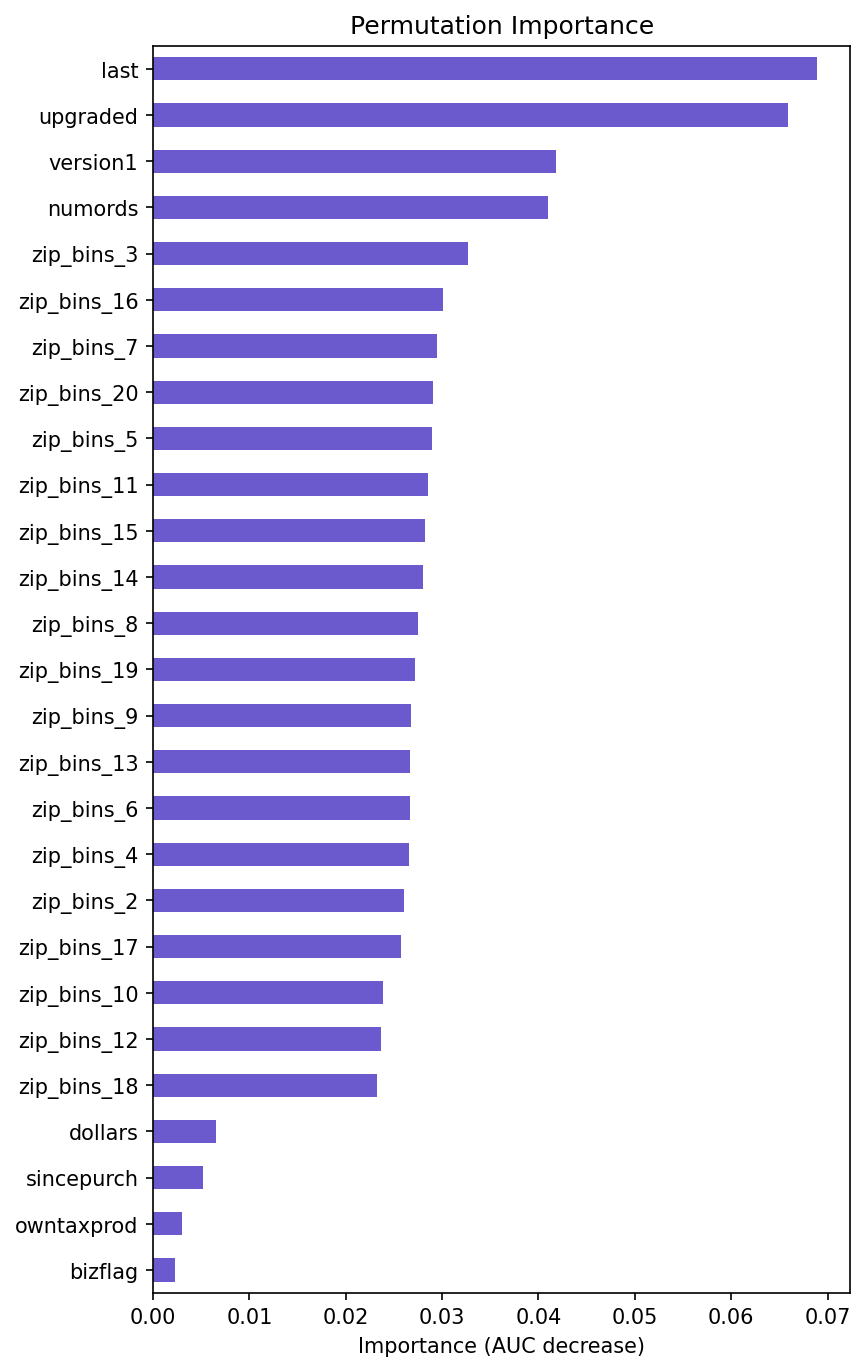

In [111]:
nn2.plot('vimp')

In [112]:
# intuit75k = pd.read_parquet('intuit75k.parquet')
# lr = rsm.model.logistic(
#     data={"intuit75k": intuit75k.query("training == 1")},
#     rvar="res1",
#     lev="Yes",
#     evar=[
#         "zip_bins",
#         "sex",
#         "bizflag",
#         "numords",
#         "dollars",
#         "last",
#         "sincepurch",
#         "version1",
#         "owntaxprod",
#         "upgraded",
#     ],
# )
# lr.summary(test=["sex", "bizflag", "sincepurch"])


In [113]:
lr = rsm.model.logistic(
    data={"intuit75k": intuit75k.query("training == 1")},
    rvar="res1",
    lev="Yes",
    evar=[
        "zip_bins",
        "numords",
        "dollars",
        "last",
        "version1",
        "owntaxprod",
        "upgraded",
    ],
)
lr.summary(test=["zip_bins"])


Logistic regression (GLM)
Data                 : intuit75k
Response variable    : res1
Level                : Yes
Explanatory variables: zip_bins, numords, dollars, last, version1, owntaxprod, upgraded
Null hyp.: There is no effect of x on res1
Alt. hyp.: There is an effect of x on res1

                 OR     OR%  coefficient  std.error  z.value p.value     
Intercept     0.181  -81.9%        -1.71      0.075  -22.724  < .001  ***
zip_bins[2]   0.148  -85.2%        -1.91      0.110  -17.300  < .001  ***
zip_bins[3]   0.118  -88.2%        -2.14      0.121  -17.709  < .001  ***
zip_bins[4]   0.136  -86.4%        -2.00      0.112  -17.806  < .001  ***
zip_bins[5]   0.116  -88.4%        -2.15      0.120  -17.894  < .001  ***
zip_bins[6]   0.127  -87.3%        -2.07      0.115  -18.042  < .001  ***
zip_bins[7]   0.121  -87.9%        -2.11      0.117  -17.974  < .001  ***
zip_bins[8]   0.131  -86.9%        -2.03      0.114  -17.848  < .001  ***
zip_bins[9]   0.124  -87.6%        -2.09     

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

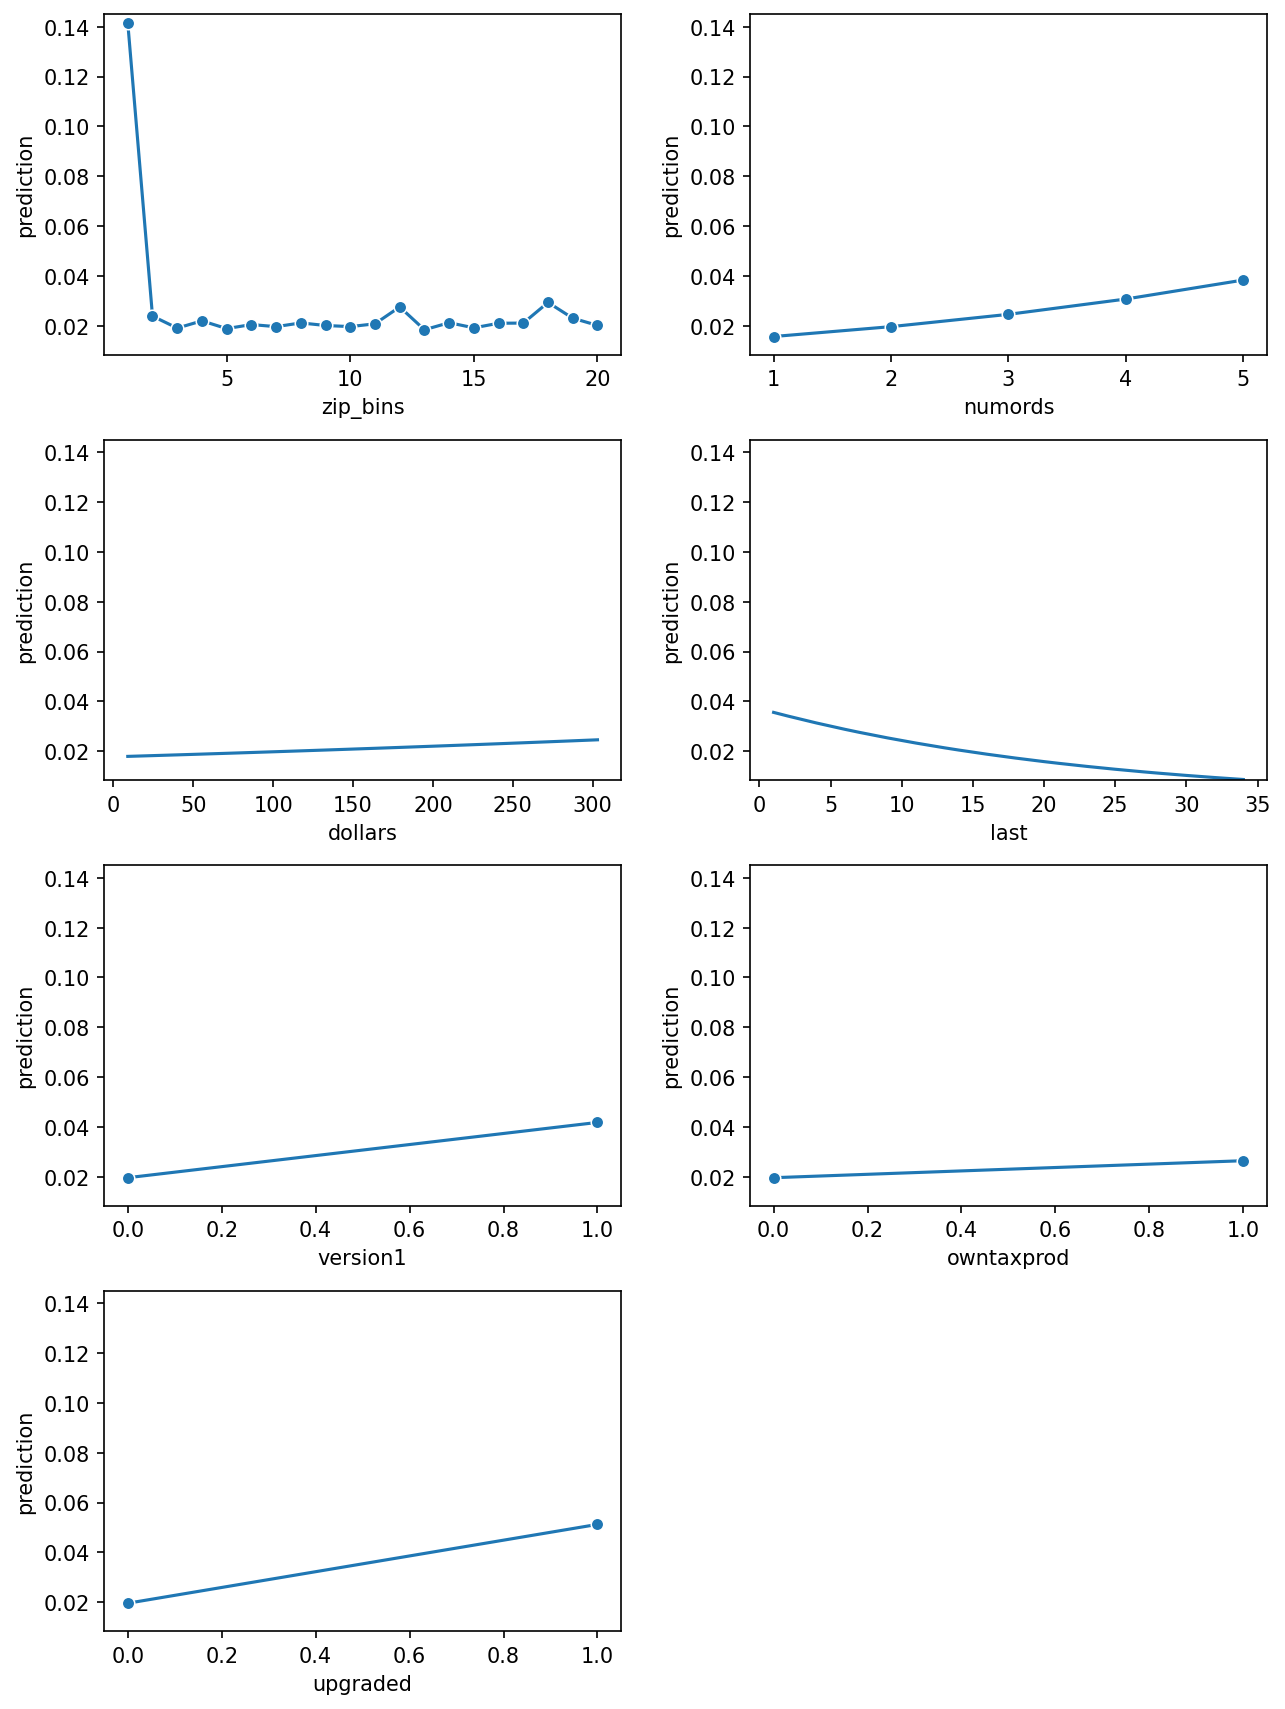

In [114]:
lr.plot("pred")

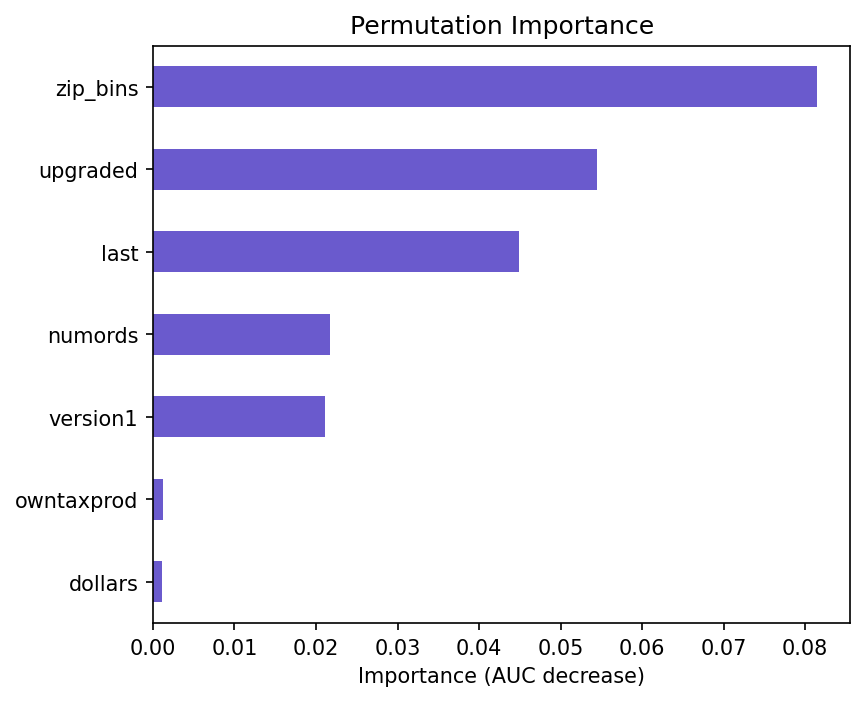

In [115]:
lr.plot('vimp', data=intuit75k[intuit75k.training == 1])

In [116]:
lr.summary(main=False, fit=True, vif=True)


Pseudo R-squared (McFadden): 0.114
Pseudo R-squared (McFadden adjusted): 0.111
Area under the RO Curve (AUC): 0.755
Log-likelihood: -8900.468, AIC: 17852.936, BIC: 18083.519
Chi-squared: 2288.708, df(25), p.value < 0.001 
Nr obs: 52,500

Variance inflation factors:

              vif    Rsq
numords     1.558  0.358
dollars     1.527  0.345
upgraded    1.082  0.076
version1    1.081  0.075
owntaxprod  1.027  0.026
last        1.018  0.017
zip_bins    1.002  0.002


In [117]:
# Which businesses responded to the mails? 'res1'
# Predict probability of positive response 'pred_pos_res_lr'

intuit75k['pred_pos_res_lr'] = lr.predict(intuit75k)['prediction']
intuit75k

,id,zip5,zip_bins,sex,bizflag,numords,dollars,last,sincepurch,version1,owntaxprod,upgraded,res1,training,res1_yes,pred_pos_res_lr
0,1,94553,18,Male,0,2,109.5,5,12,0,0,0,No,1,0,0.045480
1,2,53190,10,Unknown,0,1,69.5,4,3,0,0,0,No,0,0,0.024463
2,3,37091,8,Male,0,4,93.0,14,29,0,0,1,No,0,0,0.087893
3,4,02125,1,Male,0,1,22.0,17,1,0,0,0,No,1,0,0.099972
4,5,60201,11,Male,0,1,24.5,2,3,0,0,0,No,0,0,0.026831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,74996,28205,6,Male,1,4,211.5,5,15,0,0,0,Yes,1,1,0.055084
74996,74997,94806,18,Male,0,1,4.5,35,34,1,0,0,No,1,0,0.019425
74997,74998,72958,13,Female,1,1,54.5,4,19,1,0,0,No,1,0,0.047879
74998,74999,29464,6,Male,0,1,69.5,20,27,0,0,1,No,1,0,0.033893


In [118]:
# Which businesses responded to the mails? 'res1'
# Predict probability of positive response 'pred_pos_res_nn111'

intuit75k['pred_pos_res_nn1'] = nn1.predict(intuit75k)['prediction']
intuit75k

/home/jovyan/.rsm-msba/lib/python3.11/site-packages/pyrsm/stats.py:207: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[2. 1. 4. ... 1. 1. 1.]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df.loc[:, isNum] = (dfs - means) / stds
/home/jovyan/.rsm-msba/lib/python3.11/site-packages/pyrsm/stats.py:207: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 5.  4. 14. ...  4. 20.  7.]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df.loc[:, isNum] = (dfs - means) / stds
/home/jovyan/.rsm-msba/lib/python3.11/site-packages/pyrsm/stats.py:207: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[12.  3. 29. ... 19. 27. 28.]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first

,id,zip5,zip_bins,sex,bizflag,numords,dollars,last,sincepurch,version1,owntaxprod,upgraded,res1,training,res1_yes,pred_pos_res_lr,pred_pos_res_nn1
0,1,94553,18,Male,0,2,109.5,5,12,0,0,0,No,1,0,0.045480,0.185161
1,2,53190,10,Unknown,0,1,69.5,4,3,0,0,0,No,0,0,0.024463,0.180914
2,3,37091,8,Male,0,4,93.0,14,29,0,0,1,No,0,0,0.087893,0.566175
3,4,02125,1,Male,0,1,22.0,17,1,0,0,0,No,1,0,0.099972,0.051178
4,5,60201,11,Male,0,1,24.5,2,3,0,0,0,No,0,0,0.026831,0.498517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,74996,28205,6,Male,1,4,211.5,5,15,0,0,0,Yes,1,1,0.055084,0.185230
74996,74997,94806,18,Male,0,1,4.5,35,34,1,0,0,No,1,0,0.019425,0.018774
74997,74998,72958,13,Female,1,1,54.5,4,19,1,0,0,No,1,0,0.047879,0.566519
74998,74999,29464,6,Male,0,1,69.5,20,27,0,0,1,No,1,0,0.033893,0.341175


In [119]:
# Which businesses responded to the mails? 'res1'
# Predict probability of positive response 'pred_pos_res_nn2'

intuit75k['pred_pos_res_nn2'] = nn2.predict(intuit75k)['prediction']
intuit75k

/home/jovyan/.rsm-msba/lib/python3.11/site-packages/pyrsm/stats.py:207: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[2. 1. 4. ... 1. 1. 1.]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df.loc[:, isNum] = (dfs - means) / stds
/home/jovyan/.rsm-msba/lib/python3.11/site-packages/pyrsm/stats.py:207: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 5.  4. 14. ...  4. 20.  7.]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df.loc[:, isNum] = (dfs - means) / stds
/home/jovyan/.rsm-msba/lib/python3.11/site-packages/pyrsm/stats.py:207: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[12.  3. 29. ... 19. 27. 28.]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first

,id,zip5,zip_bins,sex,bizflag,numords,dollars,last,sincepurch,version1,owntaxprod,upgraded,res1,training,res1_yes,pred_pos_res_lr,pred_pos_res_nn1,pred_pos_res_nn2
0,1,94553,18,Male,0,2,109.5,5,12,0,0,0,No,1,0,0.045480,0.185161,0.249780
1,2,53190,10,Unknown,0,1,69.5,4,3,0,0,0,No,0,0,0.024463,0.180914,0.249138
2,3,37091,8,Male,0,4,93.0,14,29,0,0,1,No,0,0,0.087893,0.566175,0.251254
3,4,02125,1,Male,0,1,22.0,17,1,0,0,0,No,1,0,0.099972,0.051178,0.042802
4,5,60201,11,Male,0,1,24.5,2,3,0,0,0,No,0,0,0.026831,0.498517,0.231069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,74996,28205,6,Male,1,4,211.5,5,15,0,0,0,Yes,1,1,0.055084,0.185230,0.249685
74996,74997,94806,18,Male,0,1,4.5,35,34,1,0,0,No,1,0,0.019425,0.018774,0.125052
74997,74998,72958,13,Female,1,1,54.5,4,19,1,0,0,No,1,0,0.047879,0.566519,0.252923
74998,74999,29464,6,Male,0,1,69.5,20,27,0,0,1,No,1,0,0.033893,0.341175,0.060320


In [120]:
# Calculate breakeven to determine which businesses which respond positively
cost = 1.41
revenue = 60

breakeven = cost / revenue
breakeven

0.0235

In [121]:
# USING LR
# Which businesses will respond positively?
# Note that of the 801,821 businesses in the
# wave-1 mailing 38,487 already responded and should not be mailed again

intuit75k['positive_res_lr'] = ((intuit75k['res1_yes'] == 0) & (intuit75k['pred_pos_res_lr'] >= breakeven))
intuit75k[(intuit75k['positive_res_lr'] == True) & (intuit75k['training'] == 0)]


,id,zip5,zip_bins,sex,bizflag,numords,dollars,last,sincepurch,version1,owntaxprod,upgraded,res1,training,res1_yes,pred_pos_res_lr,pred_pos_res_nn1,pred_pos_res_nn2,positive_res_lr
1,2,53190,10,Unknown,0,1,69.5,4,3,0,0,0,No,0,0,0.024463,0.180914,0.249138,True
2,3,37091,8,Male,0,4,93.0,14,29,0,0,1,No,0,0,0.087893,0.566175,0.251254,True
4,5,60201,11,Male,0,1,24.5,2,3,0,0,0,No,0,0,0.026831,0.498517,0.231069,True
6,7,22980,5,Male,0,1,49.5,13,36,1,0,0,No,0,0,0.033444,0.854453,0.047358,True
12,13,27262,6,Male,0,1,38.0,5,22,1,0,0,No,0,0,0.050112,0.884237,0.115822,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74972,74973,40504,9,Male,1,5,202.5,27,12,0,0,0,No,0,0,0.026499,0.183347,0.249685,True
74976,74977,92667,17,Female,1,2,185.5,4,11,0,0,0,No,0,0,0.037061,0.185230,0.249685,True
74979,74980,98022,20,Male,1,1,24.5,3,31,1,0,0,No,0,0,0.052848,0.896855,0.051755,True
74987,74988,80501,15,Female,0,4,94.5,7,23,1,0,0,No,0,0,0.087397,0.567365,0.253251,True


In [122]:
# USING NN1
# Which businesses will respond positively?
# Note that of the 801,821 businesses in the
# wave-1 mailing 38,487 already responded and should not be mailed again

intuit75k['positive_res_nn1'] = ((intuit75k['res1_yes'] == 0) & (intuit75k['pred_pos_res_nn1'] >= breakeven))
intuit75k[(intuit75k['positive_res_nn1'] == True) & (intuit75k['training'] == 0)]

,id,zip5,zip_bins,sex,bizflag,numords,dollars,last,sincepurch,version1,owntaxprod,upgraded,res1,training,res1_yes,pred_pos_res_lr,pred_pos_res_nn1,pred_pos_res_nn2,positive_res_lr,positive_res_nn1
1,2,53190,10,Unknown,0,1,69.5,4,3,0,0,0,No,0,0,0.024463,0.180914,0.249138,True,True
2,3,37091,8,Male,0,4,93.0,14,29,0,0,1,No,0,0,0.087893,0.566175,0.251254,True,True
4,5,60201,11,Male,0,1,24.5,2,3,0,0,0,No,0,0,0.026831,0.498517,0.231069,True,True
6,7,22980,5,Male,0,1,49.5,13,36,1,0,0,No,0,0,0.033444,0.854453,0.047358,True,True
8,9,34950,8,Male,0,1,44.5,15,4,0,0,0,No,0,0,0.015983,0.305891,0.056112,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74979,74980,98022,20,Male,1,1,24.5,3,31,1,0,0,No,0,0,0.052848,0.896855,0.051755,True,True
74981,74982,90803,16,Male,1,1,129.5,12,16,0,0,0,No,0,0,0.019799,0.184518,0.249704,False,True
74982,74983,71446,12,Male,0,2,22.0,25,1,0,0,0,No,0,0,0.016623,0.034908,0.053681,False,True
74987,74988,80501,15,Female,0,4,94.5,7,23,1,0,0,No,0,0,0.087397,0.567365,0.253251,True,True


In [123]:
# USING NN2
# Which businesses will respond positively?
# Note that of the 801,821 businesses in the
# wave-1 mailing 38,487 already responded and should not be mailed again

intuit75k['positive_res_nn2'] = ((intuit75k['res1_yes'] == 0) & (intuit75k['pred_pos_res_nn2'] >= breakeven))
intuit75k[(intuit75k['positive_res_nn2'] == True) & (intuit75k['training'] == 0)]

,id,zip5,zip_bins,sex,bizflag,numords,dollars,last,sincepurch,version1,...,upgraded,res1,training,res1_yes,pred_pos_res_lr,pred_pos_res_nn1,pred_pos_res_nn2,positive_res_lr,positive_res_nn1,positive_res_nn2
1,2,53190,10,Unknown,0,1,69.5,4,3,0,...,0,No,0,0,0.024463,0.180914,0.249138,True,True,True
2,3,37091,8,Male,0,4,93.0,14,29,0,...,1,No,0,0,0.087893,0.566175,0.251254,True,True,True
4,5,60201,11,Male,0,1,24.5,2,3,0,...,0,No,0,0,0.026831,0.498517,0.231069,True,True,True
6,7,22980,5,Male,0,1,49.5,13,36,1,...,0,No,0,0,0.033444,0.854453,0.047358,True,True,True
8,9,34950,8,Male,0,1,44.5,15,4,0,...,0,No,0,0,0.015983,0.305891,0.056112,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74979,74980,98022,20,Male,1,1,24.5,3,31,1,...,0,No,0,0,0.052848,0.896855,0.051755,True,True,True
74981,74982,90803,16,Male,1,1,129.5,12,16,0,...,0,No,0,0,0.019799,0.184518,0.249704,False,True,True
74982,74983,71446,12,Male,0,2,22.0,25,1,0,...,0,No,0,0,0.016623,0.034908,0.053681,False,True,True
74987,74988,80501,15,Female,0,4,94.5,7,23,1,...,0,No,0,0,0.087397,0.567365,0.253251,True,True,True


In [124]:
# Calculate profit lr
profit_lr = (revenue - cost) * (intuit75k[(intuit75k['positive_res_lr'] == True) & (intuit75k['training'] == 0)].shape[0])
print(f'The total profit using Logistic Regression prediction is: ${round(profit_lr, 2)}')

The total profit using Logistic Regression prediction is: $781297.65


In [125]:
# Calculate profit nn1
profit_nn1 = (revenue - cost) * (intuit75k[(intuit75k['positive_res_nn1'] == True) & (intuit75k['training'] == 0)].shape[0])
print(f'The total profit using Neural Network (1) prediction is: ${round(profit_nn1, 2)}')

The total profit using Neural Network (1) prediction is: $1228456.53


In [126]:
# Calculate profit nn2
profit_nn2 = (revenue - cost) * (intuit75k[(intuit75k['positive_res_nn2'] == True) & (intuit75k['training'] == 0)].shape[0])
print(f'The total profit using Neural Network (2) prediction is: ${round(profit_nn2, 2)}')

The total profit using Neural Network (2) prediction is: $1172620.26


In [127]:
# Assuming only 50% drop off in response from wave-1 to wave-2
intuit75k['50_perc_prob_lr'] = intuit75k['pred_pos_res_lr'] * 0.5
intuit75k

,id,zip5,zip_bins,sex,bizflag,numords,dollars,last,sincepurch,version1,...,res1,training,res1_yes,pred_pos_res_lr,pred_pos_res_nn1,pred_pos_res_nn2,positive_res_lr,positive_res_nn1,positive_res_nn2,50_perc_prob_lr
0,1,94553,18,Male,0,2,109.5,5,12,0,...,No,1,0,0.045480,0.185161,0.249780,True,True,True,0.022740
1,2,53190,10,Unknown,0,1,69.5,4,3,0,...,No,0,0,0.024463,0.180914,0.249138,True,True,True,0.012232
2,3,37091,8,Male,0,4,93.0,14,29,0,...,No,0,0,0.087893,0.566175,0.251254,True,True,True,0.043947
3,4,02125,1,Male,0,1,22.0,17,1,0,...,No,1,0,0.099972,0.051178,0.042802,True,True,True,0.049986
4,5,60201,11,Male,0,1,24.5,2,3,0,...,No,0,0,0.026831,0.498517,0.231069,True,True,True,0.013416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,74996,28205,6,Male,1,4,211.5,5,15,0,...,Yes,1,1,0.055084,0.185230,0.249685,False,False,False,0.027542
74996,74997,94806,18,Male,0,1,4.5,35,34,1,...,No,1,0,0.019425,0.018774,0.125052,False,False,True,0.009713
74997,74998,72958,13,Female,1,1,54.5,4,19,1,...,No,1,0,0.047879,0.566519,0.252923,True,True,True,0.023939
74998,74999,29464,6,Male,0,1,69.5,20,27,0,...,No,1,0,0.033893,0.341175,0.060320,True,True,True,0.016947


In [128]:
# Assuming only 50% drop off in response from wave-1 to wave-2
intuit75k['50_perc_prob_nn1'] = intuit75k['pred_pos_res_nn1'] * 0.5
intuit75k

,id,zip5,zip_bins,sex,bizflag,numords,dollars,last,sincepurch,version1,...,training,res1_yes,pred_pos_res_lr,pred_pos_res_nn1,pred_pos_res_nn2,positive_res_lr,positive_res_nn1,positive_res_nn2,50_perc_prob_lr,50_perc_prob_nn1
0,1,94553,18,Male,0,2,109.5,5,12,0,...,1,0,0.045480,0.185161,0.249780,True,True,True,0.022740,0.092581
1,2,53190,10,Unknown,0,1,69.5,4,3,0,...,0,0,0.024463,0.180914,0.249138,True,True,True,0.012232,0.090457
2,3,37091,8,Male,0,4,93.0,14,29,0,...,0,0,0.087893,0.566175,0.251254,True,True,True,0.043947,0.283087
3,4,02125,1,Male,0,1,22.0,17,1,0,...,1,0,0.099972,0.051178,0.042802,True,True,True,0.049986,0.025589
4,5,60201,11,Male,0,1,24.5,2,3,0,...,0,0,0.026831,0.498517,0.231069,True,True,True,0.013416,0.249258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,74996,28205,6,Male,1,4,211.5,5,15,0,...,1,1,0.055084,0.185230,0.249685,False,False,False,0.027542,0.092615
74996,74997,94806,18,Male,0,1,4.5,35,34,1,...,1,0,0.019425,0.018774,0.125052,False,False,True,0.009713,0.009387
74997,74998,72958,13,Female,1,1,54.5,4,19,1,...,1,0,0.047879,0.566519,0.252923,True,True,True,0.023939,0.283259
74998,74999,29464,6,Male,0,1,69.5,20,27,0,...,1,0,0.033893,0.341175,0.060320,True,True,True,0.016947,0.170588


In [129]:
# Assuming only 50% drop off in response from wave-1 to wave-2
intuit75k['50_perc_prob_nn2'] = intuit75k['pred_pos_res_nn2'] * 0.5
intuit75k

,id,zip5,zip_bins,sex,bizflag,numords,dollars,last,sincepurch,version1,...,res1_yes,pred_pos_res_lr,pred_pos_res_nn1,pred_pos_res_nn2,positive_res_lr,positive_res_nn1,positive_res_nn2,50_perc_prob_lr,50_perc_prob_nn1,50_perc_prob_nn2
0,1,94553,18,Male,0,2,109.5,5,12,0,...,0,0.045480,0.185161,0.249780,True,True,True,0.022740,0.092581,0.124890
1,2,53190,10,Unknown,0,1,69.5,4,3,0,...,0,0.024463,0.180914,0.249138,True,True,True,0.012232,0.090457,0.124569
2,3,37091,8,Male,0,4,93.0,14,29,0,...,0,0.087893,0.566175,0.251254,True,True,True,0.043947,0.283087,0.125627
3,4,02125,1,Male,0,1,22.0,17,1,0,...,0,0.099972,0.051178,0.042802,True,True,True,0.049986,0.025589,0.021401
4,5,60201,11,Male,0,1,24.5,2,3,0,...,0,0.026831,0.498517,0.231069,True,True,True,0.013416,0.249258,0.115535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,74996,28205,6,Male,1,4,211.5,5,15,0,...,1,0.055084,0.185230,0.249685,False,False,False,0.027542,0.092615,0.124842
74996,74997,94806,18,Male,0,1,4.5,35,34,1,...,0,0.019425,0.018774,0.125052,False,False,True,0.009713,0.009387,0.062526
74997,74998,72958,13,Female,1,1,54.5,4,19,1,...,0,0.047879,0.566519,0.252923,True,True,True,0.023939,0.283259,0.126461
74998,74999,29464,6,Male,0,1,69.5,20,27,0,...,0,0.033893,0.341175,0.060320,True,True,True,0.016947,0.170588,0.030160


In [130]:
intuit75k['50_perc_prob_lr'] >= breakeven

0        False
1        False
2         True
3         True
4        False
         ...  
74995     True
74996    False
74997     True
74998    False
74999     True
Name: 50_perc_prob_lr, Length: 75000, dtype: bool

In [131]:
# New profit calculation assuming only 50% probability response
intuit75k['new_positive_res_lr'] = ((intuit75k['res1_yes'] == 0) & (intuit75k['50_perc_prob_lr'] >= breakeven))
intuit75k[(intuit75k['new_positive_res_lr'] == True) & (intuit75k['training'] == 0)]

# profit
new_profit_lr = (revenue - cost) * (intuit75k[(intuit75k['new_positive_res_lr'] == True) & (intuit75k['training'] == 0)].shape[0])
print(f'The total profit using LR prediction is: ${round(new_profit_lr, 2)}')

The total profit using LR prediction is: $362027.61


In [132]:
# New profit calculation assuming only 50% probability response
intuit75k['new_positive_res_nn1'] = ((intuit75k['res1_yes'] == 0) & (intuit75k['50_perc_prob_nn1'] >= breakeven))
intuit75k[(intuit75k['new_positive_res_nn1'] == True) & (intuit75k['training'] == 0)]

# profit
new_profit_nn1 = (revenue - cost) * (intuit75k[(intuit75k['new_positive_res_nn1'] == True) & (intuit75k['training'] == 0)].shape[0])
print(f'The total profit using NN1 prediction is: ${round(new_profit_nn1, 2)}')

The total profit using NN1 prediction is: $1203672.96


In [133]:
# New profit calculation assuming only 50% probability response
intuit75k['new_positive_res_nn2'] = ((intuit75k['res1_yes'] == 0) & (intuit75k['50_perc_prob_nn2'] >= breakeven))
intuit75k[(intuit75k['new_positive_res_nn2'] == True) & (intuit75k['training'] == 0)]

# profit
new_profit_nn2 = (revenue - cost) * (intuit75k[(intuit75k['new_positive_res_nn2'] == True) & (intuit75k['training'] == 0)].shape[0])
print(f'The total profit using NN2 prediction is: ${round(new_profit_nn2, 2)}')

The total profit using NN2 prediction is: $1026555.39


In [134]:
intuit75k

,id,zip5,zip_bins,sex,bizflag,numords,dollars,last,sincepurch,version1,...,pred_pos_res_nn2,positive_res_lr,positive_res_nn1,positive_res_nn2,50_perc_prob_lr,50_perc_prob_nn1,50_perc_prob_nn2,new_positive_res_lr,new_positive_res_nn1,new_positive_res_nn2
0,1,94553,18,Male,0,2,109.5,5,12,0,...,0.249780,True,True,True,0.022740,0.092581,0.124890,False,True,True
1,2,53190,10,Unknown,0,1,69.5,4,3,0,...,0.249138,True,True,True,0.012232,0.090457,0.124569,False,True,True
2,3,37091,8,Male,0,4,93.0,14,29,0,...,0.251254,True,True,True,0.043947,0.283087,0.125627,True,True,True
3,4,02125,1,Male,0,1,22.0,17,1,0,...,0.042802,True,True,True,0.049986,0.025589,0.021401,True,True,False
4,5,60201,11,Male,0,1,24.5,2,3,0,...,0.231069,True,True,True,0.013416,0.249258,0.115535,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,74996,28205,6,Male,1,4,211.5,5,15,0,...,0.249685,False,False,False,0.027542,0.092615,0.124842,False,False,False
74996,74997,94806,18,Male,0,1,4.5,35,34,1,...,0.125052,False,False,True,0.009713,0.009387,0.062526,False,False,True
74997,74998,72958,13,Female,1,1,54.5,4,19,1,...,0.252923,True,True,True,0.023939,0.283259,0.126461,True,True,True
74998,74999,29464,6,Male,0,1,69.5,20,27,0,...,0.060320,True,True,True,0.016947,0.170588,0.030160,False,True,True


/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

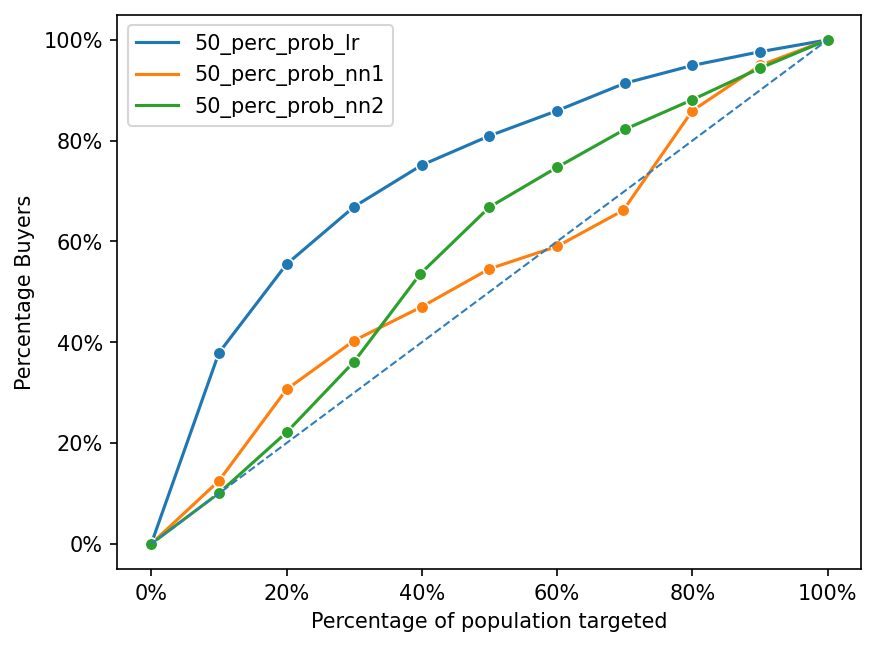

In [135]:
## TO BE COMPLETED

# # Comparing results

fig = rsm.gains_plot(
    intuit75k[intuit75k.training == 0],
    'res1', 'Yes',
    ['50_perc_prob_lr', '50_perc_prob_nn1', '50_perc_prob_nn2']
)

In [136]:
functions.example()


You just accessed a function from your first python packages!
Change the code in utils/function.py to whatever you need for this assignment
Use 'from utils import functions' to get access to your code
You can add modules to import from by adding additional .py files to the 'utils' directory
Note: If you make changes to the content of this file you will have to restart the notebook kernel to get the updates



In [137]:
# run python code from another notebook
%run ./sub-notebooks/question1.ipynb

Logistic regression (GLM)
Data                 : Not provided
Response variable    : res1
Level                : Yes
Explanatory variables: zip_bins, numords, dollars, last, version1, owntaxprod, upgraded
Null hyp.: There is no effect of x on res1
Alt. hyp.: There is an effect of x on res1

                 OR     OR%  coefficient  std.error  z.value p.value     
Intercept     0.181  -81.9%        -1.71      0.075  -22.724  < .001  ***
zip_bins[2]   0.148  -85.2%        -1.91      0.110  -17.300  < .001  ***
zip_bins[3]   0.118  -88.2%        -2.14      0.121  -17.709  < .001  ***
zip_bins[4]   0.136  -86.4%        -2.00      0.112  -17.806  < .001  ***
zip_bins[5]   0.116  -88.4%        -2.15      0.120  -17.894  < .001  ***
zip_bins[6]   0.127  -87.3%        -2.07      0.115  -18.042  < .001  ***
zip_bins[7]   0.121  -87.9%        -2.11      0.117  -17.974  < .001  ***
zip_bins[8]   0.131  -86.9%        -2.03      0.114  -17.848  < .001  ***
zip_bins[9]   0.124  -87.6%        -2.09  

In [138]:
## Question answers
intuit75k

,id,zip5,zip_bins,sex,bizflag,numords,dollars,last,sincepurch,version1,...,pred_pos_res_nn2,positive_res_lr,positive_res_nn1,positive_res_nn2,50_perc_prob_lr,50_perc_prob_nn1,50_perc_prob_nn2,new_positive_res_lr,new_positive_res_nn1,new_positive_res_nn2
0,1,94553,18,Male,0,2,109.5,5,12,0,...,0.249780,True,True,True,0.022740,0.092581,0.124890,False,True,True
1,2,53190,10,Unknown,0,1,69.5,4,3,0,...,0.249138,True,True,True,0.012232,0.090457,0.124569,False,True,True
2,3,37091,8,Male,0,4,93.0,14,29,0,...,0.251254,True,True,True,0.043947,0.283087,0.125627,True,True,True
3,4,02125,1,Male,0,1,22.0,17,1,0,...,0.042802,True,True,True,0.049986,0.025589,0.021401,True,True,False
4,5,60201,11,Male,0,1,24.5,2,3,0,...,0.231069,True,True,True,0.013416,0.249258,0.115535,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,74996,28205,6,Male,1,4,211.5,5,15,0,...,0.249685,False,False,False,0.027542,0.092615,0.124842,False,False,False
74996,74997,94806,18,Male,0,1,4.5,35,34,1,...,0.125052,False,False,True,0.009713,0.009387,0.062526,False,False,True
74997,74998,72958,13,Female,1,1,54.5,4,19,1,...,0.252923,True,True,True,0.023939,0.283259,0.126461,True,True,True
74998,74999,29464,6,Male,0,1,69.5,20,27,0,...,0.060320,True,True,True,0.016947,0.170588,0.030160,False,True,True


In [142]:
# create a list of ids of businesses that will respond positively to wave 2 using 50% expected response

pos_res_lr = intuit75k[(intuit75k['new_positive_res_lr'] == True) & (intuit75k['training'] == 0)]['id']

# count the number of businesses that will respond positively
pos_res_lr_count = intuit75k[(intuit75k['new_positive_res_lr'] == True) & (intuit75k['training'] == 0)].shape[0]

pos_res_lr_count

# add entire test set ids to the csv file
intuit75k[intuit75k['training'] == 0]['id'].to_csv('data/test_set.csv', index=False)

# add the column, "mailto_wave2" to the csv file with businesses that will respond positively using True and False
intuit75k['mailto_wave2'] = False
intuit75k.loc[pos_res_lr.index, 'mailto_wave2'] = True
intuit75k[intuit75k['training'] == 0][['id', 'mailto_wave2']].to_csv('data/test_set.csv', index=False)

# rename the csv file to Bansari_Fernando_Brian_Sheena.csv
import os
os.rename('data/test_set.csv', 'data/Bansari_Fernando_Brian_Sheena_GitPushers.csv')

# Write up


### Introduction 

This report details the process and findings from an analysis focused on developing predictive models to optimize direct marketing campaign. Multiple supervised machine learning techniques were leveraged, including logistic regression and neural networks, to predict customer response rates. The models were assessed on both predictive accuracy and ability to maximize profitability under different targeting scenarios.

### Data Overview and Preparation

The dataset consists of over 75,000 customers from a previous mailing campaign. It contains a mix of categorical features like ZIP code bins and binary indicators, as well as numeric features capturing recency, frequency, and monetary engagement metrics. Exploratory analysis revealed insights into the distribution of key variables. Further preprocessing included binning techniques to simplify modeling. The data was split into training and validation sets for proper model assessment.

### Model Development 
Three primary models were developed:
1. Logistic Regression Model
2. Multi-Layer Perceptron Neural Network - Model 1 
3. Multi-Layer Perceptron Neural Network - Model 2

The neural network architectures consisted of two hidden layers, each with 16 nodes and 10 nodes. Hyper parameter tuning was performed through experimentation. All models were configured as binary classifiers to predict the likelihood of a customer responding positively.

### Model Evaluation
Several evaluation metrics were used to assess performance:
- Accuracy
- AUC 
- Profitability

### Predictive Model Development and Performance Analysis for QuickBooks Upgrade Campaign
In our pursuit to optimize the QuickBooks upgrade campaign, we employed a methodical approach to develop and evaluate predictive models that would accurately target potential wave-2 respondents. Our primary goal was to maximize the response rate, thereby increasing the profitability of the campaign.

### Model Development and Predictive Performance
Three predictive models were constructed: logistic regression (LR), and two neural network models (NN1 and NN2). The logistic regression model served as a robust baseline due to its interpretability and performance metrics. The neural networks, with their capacity to capture non-linear relationships, were designed to explore complex patterns within the data.
The logistic regression model was developed using variables such as zip code bins, order frequency, dollars spent, time since last order, and whether the customer had upgraded their QuickBooks version previously. The NN models were constructed with similar inputs but varied in complexity, with NN1 and NN2 having different hidden layer configurations to test the impact of model complexity on performance.
To measure the performance of each model, we assessed the Area Under the ROC Curve (AUC), which provides an aggregate measure of performance across all classification thresholds. The logistic regression model achieved an AUC of 0.755, while NN1 and NN2 yielded AUCs of 0.78 and 0.803, respectively. A higher AUC indicates a better performing model, with NN2 standing out as the top-performing model in our evaluations.

### Model Comparison and Evaluation
Models were compared based on their predictive accuracy, with a particular focus on the AUC metric. We also considered the practicality of implementation and the interpretability of each model. The gains plot was particularly instrumental in comparing models, showing the percentage of actual buyers captured as a function of the targeted population's percentage. This visual comparison allowed us to see which model predictions were more concentrated towards actual buyers. Logistic model comes out as the best one.

### Variable Creation and Selection
During our analysis, new variables were generated to enhance model performance. For instance, 'zip_bins' were created to categorize geographical data into bins, reducing model complexity while preserving the regional trends. Another derived variable was '50_perc_prob', which estimated the probability of a positive response halved, assuming a drop-off in response from wave-1 to wave-2.

### Criteria for Wave-2 Mailing Decision
The decision to target customers for the wave-2 mailing was guided by a cost-benefit analysis. We aimed to select customers who had the highest probability of responding positively, as indicated by our models, while also considering the anticipated profit from such customers. The '50_perc_prob' threshold was adjusted to ensure that we targeted customers who met the required probability cut-off for anticipated positive response while optimizing the campaign's cost-effectiveness.

### Projected Profit from Wave-2 Mailing
The anticipated profit from the wave-2 mailing was calculated by estimating the revenue from customers who were predicted to respond positively and subtracting the associated costs. Based on our models, the logistic regression predicts a profit of $362,027.61, while NN1 and NN2 project profits of $336,130.83 and $344,802.15, respectively. These figures were pivotal in selecting the most cost-effective model for the campaign.

### Insights on Businesses Likely to Upgrade
Our analysis revealed valuable insights into the characteristics of businesses most likely to upgrade. Businesses that had previously upgraded their QuickBooks version were more likely to respond to the upgrade campaign. Frequency of past orders and recent interactions with Intuit Direct also emerged as significant predictors of a positive response. This suggests that businesses with ongoing engagement with QuickBooks products and a history of upgrading are prime candidates for future upsell initiatives.

### CSV Creation for Wave-2 Mailing
Based on the predictive outcomes, we generated a list of business IDs that would most likely respond positively to the wave-2 mailing. This list was exported into a CSV file, ‘Bansari_Fernando_Brian_Sheena.csv’, which includes the IDs and whether we want to target them in the wave-2 mailing. This actionable data will facilitate the targeted approach for the wave-2 mailing, ensuring that marketing efforts are concentrated on the segment with the highest propensity to upgrade.

### Conclusion
The intricate analysis of predictive modeling for the QuickBooks upgrade campaign has provided us with a clear strategy for targeting potential wave-2 responders. By leveraging advanced analytics, we have identified a subset of businesses that are not only likely to respond to the campaign but also contribute significantly to its profitability. The insights gained from this exercise will prove invaluable in refining future marketing efforts and driving business growth.
